In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data_models/info_prestamos.csv',encoding = "ISO-8859-1",delimiter=',')

In [3]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [4]:
df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25359
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [5]:
df.shape

(164309, 14)

In [6]:
df_var = df.isnull().sum()
por = 20/100
df_var = df_var[df_var < por * len(df)]
list_var_OK = df_var.index
df = df[list_var_OK]


In [7]:
df.isnull().sum()

Loan_ID                      0
Loan_Amount_Requested        0
Length_Employed           7371
Home_Owner               25359
Annual_Income            25102
Income_Verified              0
Purpose_Of_Loan              0
Debt_To_Income               0
Inquiries_Last_6Mo           0
Number_Open_Accounts         0
Total_Accounts               0
Gender                       0
Interest_Rate                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                164309 non-null  int64  
 1   Loan_Amount_Requested  164309 non-null  object 
 2   Length_Employed        156938 non-null  object 
 3   Home_Owner             138950 non-null  object 
 4   Annual_Income          139207 non-null  float64
 5   Income_Verified        164309 non-null  object 
 6   Purpose_Of_Loan        164309 non-null  object 
 7   Debt_To_Income         164309 non-null  float64
 8   Inquiries_Last_6Mo     164309 non-null  int64  
 9   Number_Open_Accounts   164309 non-null  int64  
 10  Total_Accounts         164309 non-null  int64  
 11  Gender                 164309 non-null  object 
 12  Interest_Rate          164309 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 16.3+ MB


Reconstruccion de variables

In [9]:
df['Length_Employed'].unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', nan, '6 years', '9 years', '3 years',
       '5 years'], dtype=object)

In [10]:
df['Length_Employed'] = df['Length_Employed'].str.replace('< 1 year','0 year', regex=False)

In [11]:
df['Length_Employed'].unique()

array(['0 year', '4 years', '7 years', '8 years', '2 years', '10+ years',
       '1 year', nan, '6 years', '9 years', '3 years', '5 years'],
      dtype=object)

In [12]:
df['Length_Employed'] = df['Length_Employed'].str.extract('(\d+)', expand = True)

In [13]:
df['Length_Employed'].unique()

array(['0', '4', '7', '8', '2', '10', '1', nan, '6', '9', '3', '5'],
      dtype=object)

In [14]:
df.loc[:,'Length_Employed'] = pd.to_numeric(df['Length_Employed'])

In [15]:
df['Length_Employed'].unique()

array([0.0, 4.0, 7.0, 8.0, 2.0, 10.0, 1.0, nan, 6.0, 9.0, 3.0, 5.0],
      dtype=object)

In [16]:
df['Length_Employed'] = df['Length_Employed'].astype(float)

In [17]:
df.dtypes

Loan_ID                    int64
Loan_Amount_Requested     object
Length_Employed          float64
Home_Owner                object
Annual_Income            float64
Income_Verified           object
Purpose_Of_Loan           object
Debt_To_Income           float64
Inquiries_Last_6Mo         int64
Number_Open_Accounts       int64
Total_Accounts             int64
Gender                    object
Interest_Rate              int64
dtype: object

In [18]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",0.0,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,10000002,"30,000",4.0,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,"24,725",7.0,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,"16,000",0.0,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,"17,000",8.0,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


In [19]:
df['Loan_Amount_Requested'] = df['Loan_Amount_Requested'].str.replace(",",".").astype(float)

In [20]:
df.dtypes

Loan_ID                    int64
Loan_Amount_Requested    float64
Length_Employed          float64
Home_Owner                object
Annual_Income            float64
Income_Verified           object
Purpose_Of_Loan           object
Debt_To_Income           float64
Inquiries_Last_6Mo         int64
Number_Open_Accounts       int64
Total_Accounts             int64
Gender                    object
Interest_Rate              int64
dtype: object

In [21]:
df.loc[:,['Loan_Amount_Requested','Length_Employed','Annual_Income','Debt_To_Income','Inquiries_Last_6Mo','Number_Open_Accounts','Total_Accounts','Interest_Rate']].corr()['Length_Employed'].sort_values()

Inquiries_Last_6Mo      -0.006522
Interest_Rate            0.030404
Number_Open_Accounts     0.037321
Debt_To_Income           0.049020
Annual_Income            0.069505
Loan_Amount_Requested    0.097136
Total_Accounts           0.111460
Length_Employed          1.000000
Name: Length_Employed, dtype: float64

In [22]:
df['Length_Employed'] = df['Length_Employed'].astype(float)
df['Total_Accounts'] = df['Total_Accounts'].astype(float)

In [23]:
DF=df.loc[:,['Total_Accounts','Length_Employed']].dropna()
DF

,Total_Accounts,Length_Employed
0,14.0,0.0
1,24.0,4.0
2,16.0,7.0
3,22.0,0.0
4,30.0,8.0
...,...,...
164304,16.0,10.0
164305,30.0,8.0
164306,30.0,10.0
164307,62.0,4.0


In [24]:
av = DF.groupby('Total_Accounts').mean()['Length_Employed']
av

Total_Accounts
2.0       2.500000
3.0       2.709924
4.0       3.662551
5.0       4.180240
6.0       4.260575
           ...    
99.0     10.000000
102.0     7.000000
105.0    10.000000
116.0    10.000000
156.0    10.000000
Name: Length_Employed, Length: 100, dtype: float64

In [25]:
def completar_len_emp(x,y):
    if np.isnan(y):
        return av[x]
    else: 
        return y   

In [26]:
df['Length_Employed'] = df.apply(lambda x: completar_len_emp(x['Total_Accounts'], x['Length_Employed']), axis=1)

In [27]:
df.isnull().sum()

Loan_ID                      0
Loan_Amount_Requested        0
Length_Employed              0
Home_Owner               25359
Annual_Income            25102
Income_Verified              0
Purpose_Of_Loan              0
Debt_To_Income               0
Inquiries_Last_6Mo           0
Number_Open_Accounts         0
Total_Accounts               0
Gender                       0
Interest_Rate                0
dtype: int64

In [28]:
df['Home_Owner'].value_counts()

Home_Owner
Mortgage    70345
Rent        56031
Own         12525
Other          49
Name: count, dtype: int64

In [29]:
df.dtypes

Loan_ID                    int64
Loan_Amount_Requested    float64
Length_Employed          float64
Home_Owner                object
Annual_Income            float64
Income_Verified           object
Purpose_Of_Loan           object
Debt_To_Income           float64
Inquiries_Last_6Mo         int64
Number_Open_Accounts       int64
Total_Accounts           float64
Gender                    object
Interest_Rate              int64
dtype: object

In [30]:
df.loc[:,['Loan_Amount_Requested', 'Length_Employed', 'Home_Owner', 'Annual_Income','Debt_To_Income', 'Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts', 'Interest_Rate']].groupby('Home_Owner').mean()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Interest_Rate
Home_Owner,,,,,,,,
Mortgage,16.065695,6.673973,83699.371184,17.144232,0.840387,11.860672,27.669188,2.112673
Other,10.642857,4.818072,64540.743590,14.535306,0.938776,9.306122,23.530612,2.081633
Own,13.639489,6.189912,66104.826361,17.824458,0.768782,10.967186,24.343792,2.170299
Rent,12.479045,5.081681,62077.534637,17.124675,0.708322,10.425158,22.021060,2.213382


<Axes: xlabel='Home_Owner'>

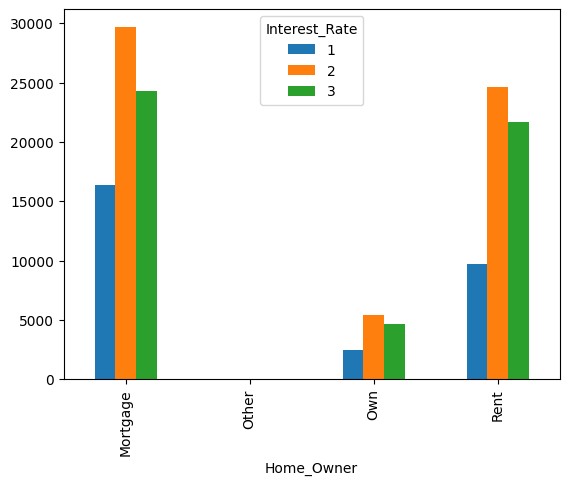

In [31]:
df.pivot_table(index = 'Home_Owner', columns ='Interest_Rate', values = 'Loan_ID', aggfunc = 'count').plot(kind='bar')

In [32]:
def completar_home_owner(x,y):
    if x == '':
        if y == 3:
            return "Rent"
        else: 
            return "Mortgage"
    else:
        return x

In [33]:
df['Home_Owner'] = df['Home_Owner'].replace(np.nan,'', regex=False)
df['Home_Owner']

0             Rent
1         Mortgage
2         Mortgage
3                 
4              Own
            ...   
164304        Rent
164305         Own
164306    Mortgage
164307        Rent
164308        Rent
Name: Home_Owner, Length: 164309, dtype: object

In [34]:
df['Home_Owner'] = df.apply(lambda x: completar_home_owner(x['Home_Owner'], x['Interest_Rate']), axis=1)

In [35]:
df.isnull().sum()

Loan_ID                      0
Loan_Amount_Requested        0
Length_Employed              0
Home_Owner                   0
Annual_Income            25102
Income_Verified              0
Purpose_Of_Loan              0
Debt_To_Income               0
Inquiries_Last_6Mo           0
Number_Open_Accounts         0
Total_Accounts               0
Gender                       0
Interest_Rate                0
dtype: int64

In [36]:
df['Annual_Income'].describe()

count    1.392070e+05
mean     7.333116e+04
std      6.037750e+04
min      4.000000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.869750e+04
max      7.500000e+06
Name: Annual_Income, dtype: float64

(array([  355.,  2895.,  9548., 17083., 18589., 19395., 15868., 13505.,
        10396.,  5743.]),
 array([ 4000.  , 13599.99, 23199.98, 32799.97, 42399.96, 51999.95,
        61599.94, 71199.93, 80799.92, 90399.91, 99999.9 ]),
 <BarContainer object of 10 artists>)

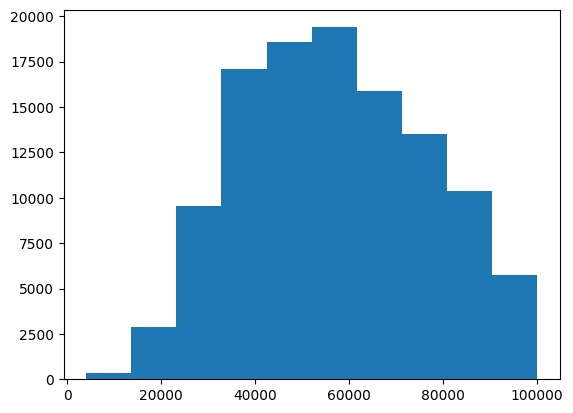

In [37]:
plt.hist(df[df['Annual_Income']<100000]['Annual_Income'], bins = 10)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                164309 non-null  int64  
 1   Loan_Amount_Requested  164309 non-null  float64
 2   Length_Employed        164309 non-null  float64
 3   Home_Owner             164309 non-null  object 
 4   Annual_Income          139207 non-null  float64
 5   Income_Verified        164309 non-null  object 
 6   Purpose_Of_Loan        164309 non-null  object 
 7   Debt_To_Income         164309 non-null  float64
 8   Inquiries_Last_6Mo     164309 non-null  int64  
 9   Number_Open_Accounts   164309 non-null  int64  
 10  Total_Accounts         164309 non-null  float64
 11  Gender                 164309 non-null  object 
 12  Interest_Rate          164309 non-null  int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 16.3+ MB


In [39]:
df.loc[:,['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts', 'Interest_Rate']].corr()['Annual_Income'].sort_values()

Debt_To_Income          -0.173589
Interest_Rate           -0.052783
Inquiries_Last_6Mo       0.060011
Length_Employed          0.070139
Number_Open_Accounts     0.145822
Total_Accounts           0.203237
Loan_Amount_Requested    0.280053
Annual_Income            1.000000
Name: Annual_Income, dtype: float64

In [40]:
av = df.loc[:,['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts', 'Interest_Rate']].groupby('Total_Accounts').mean()['Annual_Income']
av

Total_Accounts
2.0       88617.400000
3.0       36087.616140
4.0       44522.606276
5.0       45691.847537
6.0       47686.809039
             ...      
99.0      97000.000000
102.0              NaN
105.0     38000.000000
116.0    240000.000000
156.0     42000.000000
Name: Annual_Income, Length: 100, dtype: float64

In [41]:
def completar_an_in(x,y):
    if np.isnan(y):
        return av[x]
    else:
        return y

In [42]:
df['Annual_Income'] = df.apply(lambda x: completar_an_in(x['Total_Accounts'], x['Annual_Income']), axis=1)

In [43]:
df.isnull().sum()

Loan_ID                  0
Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            1
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
Interest_Rate            0
dtype: int64

In [44]:
df[df['Annual_Income'].isnull()]

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
86968,10086969,24.0,7.0,Mortgage,NaN,VERIFIED - income,home_improvement,19.51,0,10,102.0,Male,3


In [45]:
df.dropna(inplace=True)

In [46]:
df.isnull().sum()

Loan_ID                  0
Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            0
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
Interest_Rate            0
dtype: int64

inspeccion visual

<Axes: xlabel='Interest_Rate', ylabel='count'>

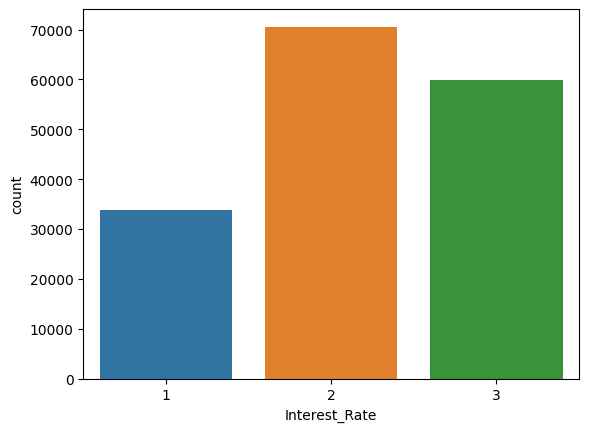

In [47]:
sns.countplot(x='Interest_Rate',data=df)

<Axes: >

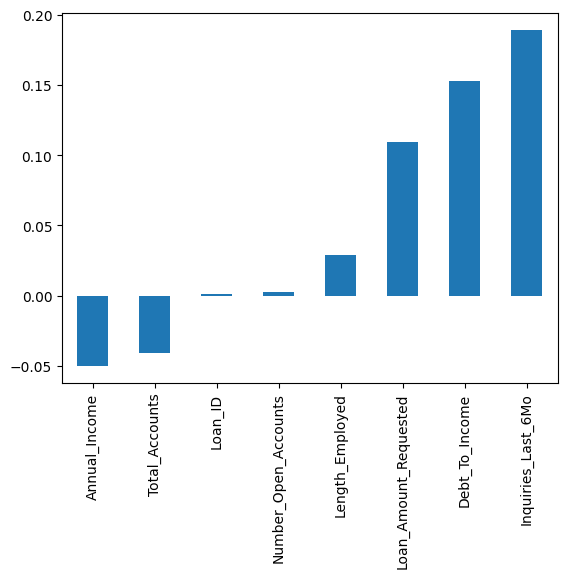

In [48]:
df.select_dtypes(include = ['int64','float64']).corr()['Interest_Rate'][:-1].sort_values().plot(kind='bar')

<Axes: xlabel='Interest_Rate', ylabel='Inquiries_Last_6Mo'>

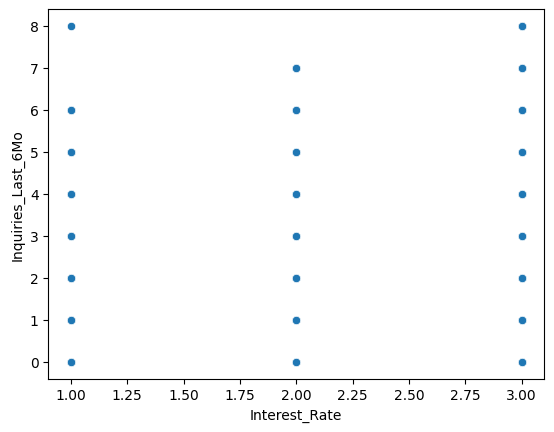

In [49]:
sns.scatterplot(x='Interest_Rate',y='Inquiries_Last_6Mo',data = df.select_dtypes(include = ['int64','float64']))

<Axes: xlabel='Gender'>

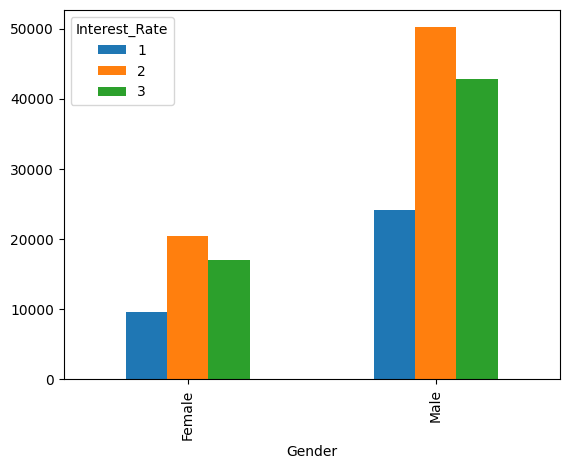

In [50]:
df.pivot_table(index='Gender' , columns='Interest_Rate', values='Loan_ID', aggfunc='count').plot(kind='bar')

<Axes: xlabel='Purpose_Of_Loan'>

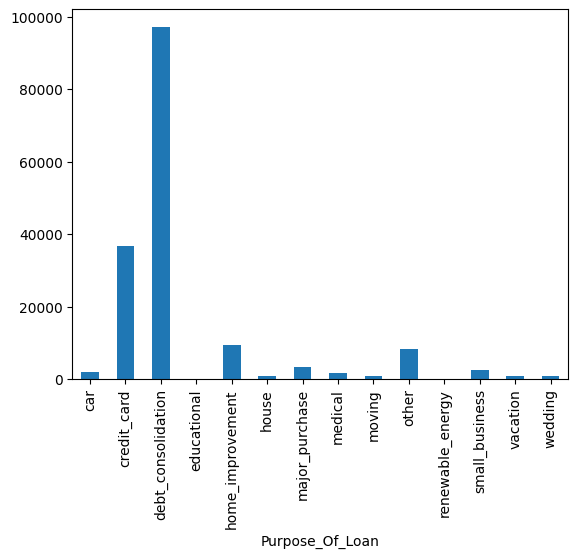

In [51]:
df.groupby('Purpose_Of_Loan').agg('count')['Interest_Rate'].plot(kind='bar')

Limpieza final

In [52]:
df.select_dtypes(include = ['int64','float64']).corr()['Interest_Rate'][:-1].sort_values()

Annual_Income           -0.050086
Total_Accounts          -0.040741
Loan_ID                  0.001289
Number_Open_Accounts     0.002849
Length_Employed          0.029096
Loan_Amount_Requested    0.109633
Debt_To_Income           0.152470
Inquiries_Last_6Mo       0.188993
Name: Interest_Rate, dtype: float64

In [53]:
df.select_dtypes(include = ['object']).columns

Index(['Home_Owner', 'Income_Verified', 'Purpose_Of_Loan', 'Gender'], dtype='object')

In [54]:
df = df.drop(['Loan_ID','Number_Open_Accounts','Income_Verified'],axis=1)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164308 entries, 0 to 164308
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_Amount_Requested  164308 non-null  float64
 1   Length_Employed        164308 non-null  float64
 2   Home_Owner             164308 non-null  object 
 3   Annual_Income          164308 non-null  float64
 4   Purpose_Of_Loan        164308 non-null  object 
 5   Debt_To_Income         164308 non-null  float64
 6   Inquiries_Last_6Mo     164308 non-null  int64  
 7   Total_Accounts         164308 non-null  float64
 8   Gender                 164308 non-null  object 
 9   Interest_Rate          164308 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 13.8+ MB


In [56]:
df['Home_Owner'].value_counts()

Home_Owner
Mortgage    86381
Rent        65353
Own         12525
Other          49
Name: count, dtype: int64

Dummificación

In [57]:
df['Home_Owner'].shape[0]

164308

In [58]:
#buscar concepto other, elimar del registro => sentido ok
print(f"Antes de aplciar la eliminacion: Num_filas = {df['Home_Owner'].shape[0]}")
df = df[df['Home_Owner'] != 'Other']
print(f"Despues de aplciar la eliminacion: Num_filas = {df['Home_Owner'].shape[0]} - comprobacion: {164308-df['Home_Owner'].shape[0]-49 == 0}")

Antes de aplciar la eliminacion: Num_filas = 164308
Despues de aplciar la eliminacion: Num_filas = 164259 - comprobacion: True


In [59]:
df['Purpose_Of_Loan'].value_counts()

Purpose_Of_Loan
debt_consolidation    97081
credit_card           36670
home_improvement       9266
other                  8341
major_purchase         3432
small_business         2391
car                    1884
medical                1539
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             120
Name: count, dtype: int64

In [60]:
# Recategorizar  => sentido genetico ok
## - debt_consolidation    
## - credit_card           
## - home_improvement
## - other
## - significant_expenses = major_purchase + small_business + car + medical
## - life_events = moving + vacation + wedding + house + renewable_energy + educational

recategorizacion = {
    'major_purchase':'significant_expenses',
    'small_business':'significant_expenses',
    'car':'significant_expenses',
    'medical':'significant_expenses',
    'moving':'life_events',
    'vacation':'life_events',
    'wedding':'life_events',
    'house':'life_events',
    'renewable_energy':'life_events',
    'educational':'life_events'
}
df['Purpose_Of_Loan'] = df['Purpose_Of_Loan'].replace(recategorizacion)
df['Purpose_Of_Loan'].value_counts()

Purpose_Of_Loan
debt_consolidation      97081
credit_card             36670
home_improvement         9266
significant_expenses     9246
other                    8341
life_events              3655
Name: count, dtype: int64

In [61]:
df['Gender'].value_counts()

Gender
Male      117143
Female     47116
Name: count, dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164259 entries, 0 to 164308
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_Amount_Requested  164259 non-null  float64
 1   Length_Employed        164259 non-null  float64
 2   Home_Owner             164259 non-null  object 
 3   Annual_Income          164259 non-null  float64
 4   Purpose_Of_Loan        164259 non-null  object 
 5   Debt_To_Income         164259 non-null  float64
 6   Inquiries_Last_6Mo     164259 non-null  int64  
 7   Total_Accounts         164259 non-null  float64
 8   Gender                 164259 non-null  object 
 9   Interest_Rate          164259 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 13.8+ MB


In [66]:
dummies = pd.get_dummies(df[['Home_Owner','Purpose_Of_Loan','Gender']])
dummies

,Home_Owner_Mortgage,Home_Owner_Own,Home_Owner_Rent,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_life_events,Purpose_Of_Loan_other,Purpose_Of_Loan_significant_expenses,Gender_Female,Gender_Male
0,False,False,True,False,False,False,False,False,True,True,False
1,True,False,False,False,True,False,False,False,False,True,False
2,True,False,False,False,True,False,False,False,False,False,True
3,False,False,True,False,True,False,False,False,False,False,True
4,False,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
164304,False,False,True,True,False,False,False,False,False,False,True
164305,False,True,False,False,False,False,False,False,True,False,True
164306,True,False,False,True,False,False,False,False,False,False,True
164307,False,False,True,False,False,False,False,False,True,True,False


In [69]:
df_post = pd.concat([df,dummies],axis=1)
df_post

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Total_Accounts,Gender,Interest_Rate,...,Home_Owner_Own,Home_Owner_Rent,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_life_events,Purpose_Of_Loan_other,Purpose_Of_Loan_significant_expenses,Gender_Female,Gender_Male
0,7.000,0.0,Rent,68000.000000,significant_expenses,18.37,0,14.0,Female,1,...,False,True,False,False,False,False,False,True,True,False
1,30.000,4.0,Mortgage,73993.446610,debt_consolidation,14.93,0,24.0,Female,3,...,False,False,False,True,False,False,False,False,True,False
2,24.725,7.0,Mortgage,75566.400000,debt_consolidation,15.88,0,16.0,Male,3,...,False,False,False,True,False,False,False,False,False,True
3,16.000,0.0,Rent,56160.000000,debt_consolidation,14.34,3,22.0,Male,3,...,False,True,False,True,False,False,False,False,False,True
4,17.000,8.0,Own,96000.000000,debt_consolidation,22.17,1,30.0,Female,1,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,20.725,10.0,Rent,63177.689708,credit_card,13.56,0,16.0,Male,2,...,False,True,True,False,False,False,False,False,False,True
164305,6.000,8.0,Own,80571.309081,significant_expenses,9.12,0,30.0,Male,2,...,True,False,False,False,False,False,False,True,False,True
164306,20.250,10.0,Mortgage,80571.309081,credit_card,18.17,1,30.0,Male,1,...,False,False,True,False,False,False,False,False,False,True
164307,10.000,4.0,Rent,99004.385278,significant_expenses,18.75,1,62.0,Female,3,...,False,True,False,False,False,False,False,True,True,False


In [70]:
df_post = df_post.drop(['Home_Owner','Purpose_Of_Loan','Gender'],axis=1)
df_post

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Total_Accounts,Interest_Rate,Home_Owner_Mortgage,Home_Owner_Own,Home_Owner_Rent,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_life_events,Purpose_Of_Loan_other,Purpose_Of_Loan_significant_expenses,Gender_Female,Gender_Male
0,7.000,0.0,68000.000000,18.37,0,14.0,1,False,False,True,False,False,False,False,False,True,True,False
1,30.000,4.0,73993.446610,14.93,0,24.0,3,True,False,False,False,True,False,False,False,False,True,False
2,24.725,7.0,75566.400000,15.88,0,16.0,3,True,False,False,False,True,False,False,False,False,False,True
3,16.000,0.0,56160.000000,14.34,3,22.0,3,False,False,True,False,True,False,False,False,False,False,True
4,17.000,8.0,96000.000000,22.17,1,30.0,1,False,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,20.725,10.0,63177.689708,13.56,0,16.0,2,False,False,True,True,False,False,False,False,False,False,True
164305,6.000,8.0,80571.309081,9.12,0,30.0,2,False,True,False,False,False,False,False,False,True,False,True
164306,20.250,10.0,80571.309081,18.17,1,30.0,1,True,False,False,True,False,False,False,False,False,False,True
164307,10.000,4.0,99004.385278,18.75,1,62.0,3,False,False,True,False,False,False,False,False,True,True,False


In [71]:
df_post.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164259 entries, 0 to 164308
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Loan_Amount_Requested                 164259 non-null  float64
 1   Length_Employed                       164259 non-null  float64
 2   Annual_Income                         164259 non-null  float64
 3   Debt_To_Income                        164259 non-null  float64
 4   Inquiries_Last_6Mo                    164259 non-null  int64  
 5   Total_Accounts                        164259 non-null  float64
 6   Interest_Rate                         164259 non-null  int64  
 7   Home_Owner_Mortgage                   164259 non-null  bool   
 8   Home_Owner_Own                        164259 non-null  bool   
 9   Home_Owner_Rent                       164259 non-null  bool   
 10  Purpose_Of_Loan_credit_card           164259 non-null  bool   
 11  Purpo

train-test

In [72]:
X = df_post.drop('Interest_Rate',axis=1)
y = df_post['Interest_Rate']

In [74]:
y

0         1
1         3
2         3
3         3
4         1
         ..
164304    2
164305    2
164306    1
164307    3
164308    2
Name: Interest_Rate, Length: 164259, dtype: int64

In [75]:
y = pd.get_dummies(y)
y

,1,2,3
0,True,False,False
1,False,False,True
2,False,False,True
3,False,False,True
4,True,False,False
...,...,...,...
164304,False,True,False
164305,False,True,False
164306,True,False,False
164307,False,False,True


In [77]:
y = y.values
y

array([[ True, False, False],
       [False, False,  True],
       [False, False,  True],
       ...,
       [ True, False, False],
       [False, False,  True],
       [False,  True, False]])

In [79]:
y = y.astype(np.uint)
y

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint32)

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [82]:
print(f"X_train.shape={X_train.shape}\nX_test.shape={X_test.shape}")

X_train.shape=(114981, 17)
X_test.shape=(49278, 17)


In [88]:
X_train = X_train.values
X_train

array([[20.0, 6.184830763778132, 74880.0, ..., False, False, True],
       [10.0, 10.0, 48000.0, ..., False, False, True],
       [5.5, 1.0, 47686.80903881701, ..., False, False, True],
       ...,
       [15.0, 10.0, 110000.0, ..., True, True, False],
       [4.025, 3.0, 34000.0, ..., False, False, True],
       [9.0, 4.0, 40000.0, ..., False, True, False]], dtype=object)

In [89]:
X_test=X_test.values
X_test

array([[15.0, 2.0, 88000.0, ..., False, True, False],
       [1.45, 1.0, 72515.0, ..., False, True, False],
       [17.6, 10.0, 50000.0, ..., False, True, False],
       ...,
       [5.0, 4.0, 34000.0, ..., False, False, True],
       [15.0, 6.23101624480544, 75000.0, ..., False, False, True],
       [24.175, 10.0, 106458.0, ..., False, False, True]], dtype=object)

In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [92]:
X_train

array([[0.02002107, 0.61848308, 0.00945571, ..., 0.        , 0.        ,
        1.        ],
       [0.00948367, 1.        , 0.0058698 , ..., 0.        , 0.        ,
        1.        ],
       [0.00474183, 0.1       , 0.00582802, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.01475237, 1.        , 0.01414088, ..., 1.        , 1.        ,
        0.        ],
       [0.00318757, 0.3       , 0.00400213, ..., 0.        , 0.        ,
        1.        ],
       [0.00842993, 0.4       , 0.00480256, ..., 0.        , 1.        ,
        0.        ]])

In [93]:
X_test

array([[1.55728587e-02, 2.00000000e-01, 2.15103445e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.00556174e-04, 1.00000000e-01, 1.75355511e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.84649611e-02, 1.00000000e+00, 1.17562503e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [4.44938821e-03, 4.00000000e-01, 7.64926331e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.55728587e-02, 6.23101624e-01, 1.81734175e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.57786429e-02, 1.00000000e+00, 2.62482674e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [94]:
print(f"X_train.shape={X_train.shape}\nX_test.shape={X_test.shape}")

X_train.shape=(114981, 17)
X_test.shape=(49278, 17)


Modelaje

In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [135]:
num_neruonas = X_train.shape[1]
num_nuronas_final = len(df['Interest_Rate'].unique())
print(f"num_neruonas = {num_neruonas}\nnum_nuronas_final = {num_nuronas_final}")

num_neruonas = 17
num_nuronas_final = 3


In [136]:
model = Sequential() # 17 >0.5> 11 >0.4>  8 >0.3> 5 >0.2> 3
model.add(Dense(units = int(num_neruonas),activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = int(11),activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units = int(np.round(num_neruonas/2)),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units = int(5),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = int(num_nuronas_final),activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])

In [137]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [138]:
#model.fit(x=X_train, 
#          y=y_train, 
#          epochs=600,
#          batch_size=15,
#          validation_data=(X_test, y_test), verbose=1,
#          callbacks=[early_stop]
#          )
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - categorical_accuracy: 0.4170 - loss: 1.0774 - val_categorical_accuracy: 0.4288 - val_loss: 1.0569
Epoch 2/200
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - categorical_accuracy: 0.4314 - loss: 1.0546 - val_categorical_accuracy: 0.4288 - val_loss: 1.0462
Epoch 3/200
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - categorical_accuracy: 0.4366 - loss: 1.0432 - val_categorical_accuracy: 0.4903 - val_loss: 1.0137
Epoch 4/200
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - categorical_accuracy: 0.4609 - loss: 1.0254 - val_categorical_accuracy: 0.4976 - val_loss: 1.0059
Epoch 5/200
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - categorical_accuracy: 0.4715 - loss: 1.0166 - val_categorical_accuracy: 0.4981 - val_loss: 1.0064
Epoch 6/200
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - categorical_accuracy: 0.4722 - loss: 1.0128 - val_categorical_accuracy: 0.4986 - val_loss: 1.0050
Epoch 7/200
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step -

Epoch 44/200
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - categorical_accuracy: 0.4924 - loss: 0.9938 - val_categorical_accuracy: 0.5073 - val_loss: 0.9884
Epoch 45/200
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - categorical_accuracy: 0.4921 - loss: 0.9925 - val_categorical_accuracy: 0.5082 - val_loss: 0.9886
Epoch 46/200
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - categorical_accuracy: 0.4930 - loss: 0.9933 - val_categorical_accuracy: 0.5124 - val_loss: 0.9856
Epoch 47/200
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - categorical_accuracy: 0.4909 - loss: 0.9968 - val_categorical_accuracy: 0.5102 - val_loss: 0.9855
Epoch 48/200
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - categorical_accuracy: 0.4939 - loss: 0.9904 - val_categorical_accuracy: 0.5045 - val_loss: 0.9904
Epoch 49/200
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - categorical_accuracy: 0.4998 - loss: 0.9924 - val_categorical_accuracy: 0.5083 - val_loss: 0.9871
Epoch 50/200
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - catego

KeyboardInterrupt: 

<Axes: >

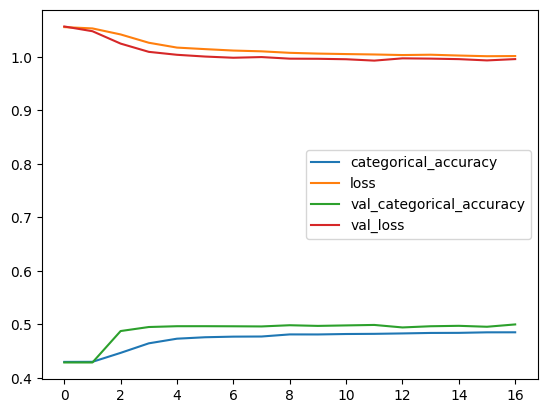

In [104]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [105]:
prediccion = model.predict(X_test)
prediccion

1540/1540 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step


array([[0.20271514, 0.4496831 , 0.34760174],
       [0.29453814, 0.4931493 , 0.21231247],
       [0.1289853 , 0.39428738, 0.47672737],
       ...,
       [0.11666448, 0.3804755 , 0.50286007],
       [0.2011954 , 0.4485075 , 0.35029703],
       [0.13588145, 0.40111533, 0.46300328]], dtype=float32)

In [106]:
y_test

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint32)

In [107]:
prediccion = np.argmax(prediccion,axis=1)
prediccion

array([1, 1, 2, ..., 2, 1, 2], dtype=int64)

In [110]:
prediccion_real = prediccion + 1
prediccion_real

array([2, 2, 3, ..., 3, 2, 3], dtype=int64)

In [111]:
df_test = pd.DataFrame(y_test, columns = ['Interest_rate_1','Interest_rate_2','Interest_rate_3'])
df_test

,Interest_rate_1,Interest_rate_2,Interest_rate_3
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,1,0,0
...,...,...,...
49273,0,1,0
49274,0,0,1
49275,0,0,1
49276,0,1,0


In [123]:
df_test["Clase_Real"] = np.where(df_test['Interest_rate_1'] == 1,1,np.where(df_test['Interest_rate_2'] == 1,2,3))
df_test["Clase_Real"]

0        3
1        2
2        3
3        3
4        1
        ..
49273    2
49274    3
49275    3
49276    2
49277    3
Name: Clase_Real, Length: 49278, dtype: int32

In [125]:
clases = [1,2,3]
array_clases_real = df_test["Clase_Real"].to_numpy()
array_clases_real

array([3, 2, 3, ..., 3, 2, 3])

In [128]:
cnf_matrix = confusion_matrix( array_clases_real , prediccion_real , labels = clases )
cnf_matrix

array([[    0,  9012,  1186],
       [    0, 16199,  4929],
       [    0,  9520,  8432]], dtype=int64)

In [129]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python/40068
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix sin normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix sin normalizar
[[    0  9012  1186]
 [    0 16199  4929]
 [    0  9520  8432]]


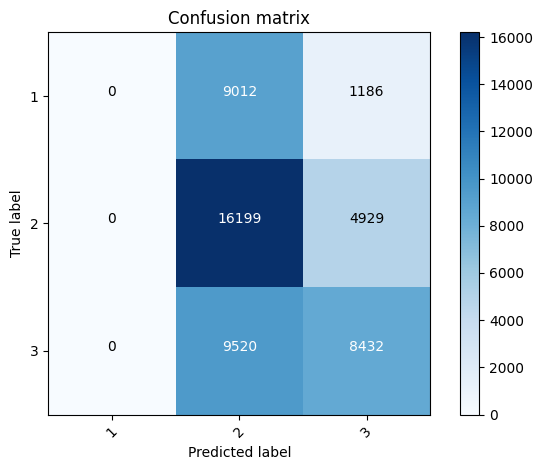

In [130]:
np.set_printoptions(precision = 2)

plt.figure()
plot_confusion_matrix(cnf_matrix , classes = clases)

In [133]:
clases2 = ['Clase 1' , 'Clase 2' , 'Clase 3']

print(f"Confusion matrix:\n{cnf_matrix}")
reporte = classification_report(array_clases_real , prediccion_real , target_names = clases2)
print(f"Clasificacion Reporte:\n{reporte}")
acuracy = accuracy_score(array_clases_real , prediccion_real )
print(f"Precision:\n{acuracy}")

Confusion matrix:
[[    0  9012  1186]
 [    0 16199  4929]
 [    0  9520  8432]]
Clasificacion Reporte:
              precision    recall  f1-score   support

     Clase 1       0.00      0.00      0.00     10198
     Clase 2       0.47      0.77      0.58     21128
     Clase 3       0.58      0.47      0.52     17952

    accuracy                           0.50     49278
   macro avg       0.35      0.41      0.37     49278
weighted avg       0.41      0.50      0.44     49278

Precision:
0.4998376557490158


C:\Users\jcrh1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jcrh1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jcrh1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo